In [69]:
# imports
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
import math
from sklearn.metrics       import mean_squared_error
# jupyter command - allows plots to show up
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [70]:
# The interval between each dataset (original data in 5 minute intervals)
time_grouping = '5min'

# load the dataset
dataframe = pd.read_csv('ignored_assets/paxout_table.csv', engine='python', nrows=5000)
dataframe['time_bucket'] = pd.to_datetime(dataframe['time_bucket'])
dataframe = dataframe.set_index('time_bucket')
dataframe['y'] = dataframe.sum(axis=1)
dataframe['ds'] = dataframe.index.round(time_grouping)


# The data set with the sum of all the cars out at the 
dataframe = dataframe[['y','ds']].groupby('ds').sum()

dataset_orig = dataframe.values
dataset_orig = dataset_orig.astype('float32')

In [71]:
dataframe = dataframe.reset_index()

In [72]:
dataframe['y'] = np.log(dataframe['y'])
dataframe.head()

,ds,y
0,2016-01-01 00:00:00,5.934894
1,2016-01-01 00:05:00,7.065613
2,2016-01-01 00:10:00,7.329094
3,2016-01-01 00:15:00,7.261225
4,2016-01-01 00:20:00,7.208600


In [73]:
model = Prophet()
model.fit(dataframe)

Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
Enabling daily seasonality. Run prophet with daily_seasonality=False to override this.


In [74]:
future = model.make_future_dataframe(periods=1, freq=time_grouping)
future.head()

,ds
0,2016-01-01 00:00:00
1,2016-01-01 00:05:00
2,2016-01-01 00:10:00
3,2016-01-01 00:15:00
4,2016-01-01 00:20:00


In [75]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-01 00:00:00,6.684631,6.317247,7.083912
1,2016-01-01 00:05:00,6.655187,6.304326,7.018008
2,2016-01-01 00:10:00,6.625400,6.263930,6.978890
3,2016-01-01 00:15:00,6.595151,6.215176,6.986027
4,2016-01-01 00:20:00,6.564321,6.210986,6.916448


In [76]:
# undoes the np.log transformation done earlier
forecast['yhat_upper'] = np.exp(forecast['yhat_upper'])
forecast['yhat'] = np.exp(forecast['yhat'])
forecast['yhat_lower'] = np.exp(forecast['yhat_lower'])
dataframe['y'] = np.exp(dataframe["y"])

294.26 RMSE


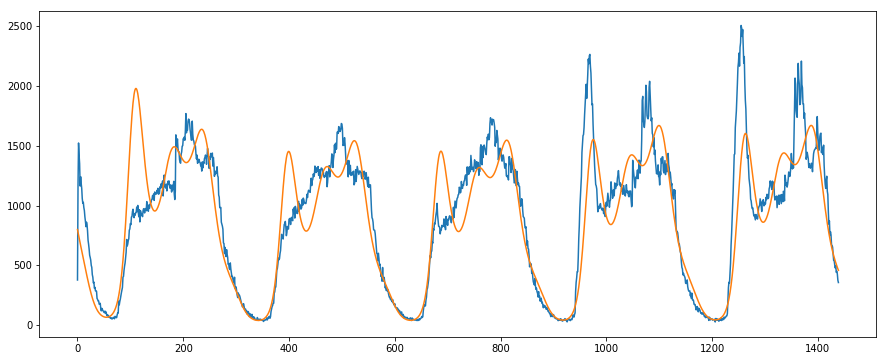

In [91]:
# plots the actual data
plt.plot(dataframe['y'][:2880/2])
# plots Prophet's forecasted data
#plt.plot(forecast['yhat_upper'][:2880/2])
plt.plot(forecast['yhat'      ][:2880/2])
#plt.plot(forecast['yhat_lower'][:2880/2])

rmse = math.sqrt(mean_squared_error(dataframe['y'][:5000], forecast['yhat'][:5000]))
print "%.2f RMSE" % (rmse)



In [ ]:
model.plot(forecast)

In [ ]:
model.plot_components(forecast)